<a href="https://colab.research.google.com/github/youngpaper1115/Mobile_Game_Analysis/blob/main/mobilegame_analysis_ver1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 import 및 현재 작업공간 확인
import datetime as dt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

# 머신러닝 데이터 처리 임포트
from sklearn.neighbors import KNeighborsClassifier    # 결측값을 위한 KNN 분류기
from sklearn.preprocessing import MinMaxScaler, StandardScaler    # 데이터 스케일링 라이브러리
from sklearn.decomposition import PCA, KernelPCA    # 차원 축소 라이브러리
from sklearn.model_selection import train_test_split, KFold    # Train/Test Set 구분 라이브러리
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN    # 오버샘플링 라이브러리
from imblearn.combine import SMOTEENN, SMOTETomek    # 복합샘플링 라이브러리

# 머신러닝 모델링 임포트
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.linear_model import LogisticRegression, Lasso, Ridge    # 로지스틱회귀, 라쏘, 릿지 라이브러리
from sklearn.tree import DecisionTreeClassifier    # 의사결정나무 라이브러리
from sklearn.ensemble import RandomForestClassifier    # Random Forest 라이브러리
from sklearn.svm import SVC    # SVC 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from lightgbm import LGBMClassifier    # LGBM 라이브러리
from sklearn.model_selection import GridSearchCV    # GridSearch 라이브러리

%matplotlib notebook
%matplotlib inline

os.getcwd

<function posix.getcwd>

In [3]:
# 게임데이터 raw data에 대한 데이터프레임 생성
mg_df = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/game_rawdata_ver1.1.xlsx')

In [4]:
mg_df.head()

,idx,title,total_ratings,installs,avg_rating,growth_30days,growth_60days,price,game_cat
0,1,Garena Free Fire - Illuminate,106233021,1000.0 M,3.91,0.007,0.030,Free,game_action
1,2,PUBG MOBILE,41679139,500.0 M,4.10,0.007,0.035,Free,game_action
2,3,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action
3,4,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action
4,5,Sniper 3D：Gun Shooting Games,15392422,500.0 M,4.38,0.005,0.012,Free,game_action


In [5]:
# 게임데이터 raw data(용량큼)에 대한 데이터프레임 생성
mg_df_b = pd.read_csv('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/Google-Playstore_202106.csv')

In [6]:
mg_df_b.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


데이터 inner join

In [7]:
df_INNER_JOIN = pd.merge(mg_df, mg_df_b, left_on='title', right_on='App Name', how='inner')

In [8]:
df_INNER_JOIN.head(20)

,idx,title,total_ratings,installs,avg_rating,growth_30days,growth_60days,price,game_cat,App Name,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,3,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action,Mobile Legends: Bang Bang,...,https://m.mobilelegends.com/,mobilelegendsgame@moonton.com,"Oct 31, 2016","Jun 10, 2021",Teen,https://m.mobilelegends.com/en/newsdetail/475,True,True,False,2021-06-16 02:45:58
1,4,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action,Brawl Stars,...,http://www.supercell.net,gp-info@supercell.com,"Dec 12, 2018","May 20, 2021",Everyone 10+,http://supercell.com/privacy-policy/,False,True,True,2021-06-16 00:44:15
2,6,Shadow Fight 2,15069841,100.0 M,4.64,0.007,0.015,Free,game_action,Shadow Fight 2,...,http://support.shadowfight2.com,support@nekki.mail.helpshift.com,"Jul 22, 2014","May 19, 2021",Everyone 10+,http://nekki.ru/privacy.php,True,True,False,2021-06-15 21:01:31
3,8,Among Us,12989150,100.0 M,3.61,0.005,0.012,Free,game_action,Among Us,...,https://www.innersloth.com,support@innersloth.com,"Jun 15, 2018","Jun 14, 2021",Everyone 10+,https://www.innersloth.com/privacy.php,True,True,True,2021-06-15 21:57:23
4,9,Temple Run 2,9854530,500.0 M,4.46,0.002,0.005,Free,game_action,Temple Run 2,...,http://www.imangistudios.com/contact.html,support-tr2@imangistudios.com,"Jan 23, 2013","Jun 08, 2021",Everyone,http://imangistudios.com/privacy/privacy-polic...,True,True,True,2021-06-16 14:28:54
5,10,PUBG MOBILE LITE,8030915,100.0 M,4.11,0.005,0.011,Free,game_action,PUBG MOBILE LITE,...,https://www.pubgmlite.com/en-US,PUBGMOBILElite_CS@tencentgames.com,NaN,"Apr 13, 2021",Teen,http://game.qq.com/privacy_en.shtml,True,False,True,2021-06-16 11:18:58
6,11,Standoff 2,6894560,50.0 M,4.38,0.044,0.092,Free,game_action,Standoff 2,...,https://www.facebook.com/Standoff2Official,standoff2@axlebolt.com,"Jul 19, 2017","Jun 14, 2021",Mature 17+,https://axlebolt.com/privacy_policy,True,True,False,2021-06-16 07:54:27
7,12,slither.io,6656272,500.0 M,3.96,0.002,0.005,Free,game_action,slither.io,...,http://slither.io,team@slither.io,"Mar 25, 2016","Dec 20, 2019",Everyone,http://slither.io/privacyapp/,True,True,False,2021-06-16 06:28:43
8,14,Gangstar Vegas: World of Crime,6530227,100.0 M,4.33,0.003,0.009,Free,game_action,Gangstar Vegas: World of Crime,...,http://www.gameloft.com/,android.support@gameloft.com,"Jun 19, 2013","May 25, 2021",Mature 17+,http://www.gameloft.com/privacy-notice/,True,True,False,2021-06-15 23:13:42
9,16,Talking Tom Gold Run,5226620,100.0 M,4.25,0.011,0.023,Free,game_action,Talking Tom Gold Run,...,http://outfit7.com/contact/android/,support@outfit7.com,"Jul 13, 2016","May 18, 2021",Everyone,http://outfit7.com/privacy/,True,True,True,2021-06-16 06:37:42


In [9]:
df_INNER_JOIN.describe()

,idx,total_ratings,avg_rating,growth_30days,growth_60days,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,19823.000000,1.982300e+04,19823.000000,19823.000000,19823.000000,19657.000000,1.965700e+04,1.982200e+04,1.982300e+04,19823.000000
mean,2983.623720,2.466428e+05,4.343832,0.020718,0.041395,3.454347,1.022964e+05,4.536585e+06,7.903959e+06,0.021939
std,1741.523491,9.305778e+05,0.391334,0.378222,0.758057,1.707202,7.655453e+05,2.017059e+07,3.392652e+07,0.251257
min,3.000000,2.970000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2004.000000,3.052900e+04,4.170000,0.001000,0.002000,3.700000,1.000000e+01,1.000000e+03,1.084000e+03,0.000000
50%,2253.000000,7.668600e+04,4.420000,0.003000,0.007000,4.200000,6.730000e+02,1.000000e+05,1.123130e+05,0.000000
75%,3881.000000,2.241010e+05,4.600000,0.012000,0.027000,4.500000,3.823600e+04,1.000000e+06,4.713141e+06,0.000000
max,8000.000000,5.812736e+07,5.000000,47.548000,95.096000,5.000000,5.602542e+07,1.000000e+09,1.704496e+09,7.490000


In [10]:
df_INNER_JOIN.notnull().sum()

idx                  19823
title                19823
total_ratings        19823
installs             19823
avg_rating           19823
growth_30days        19823
growth_60days        19823
price                19823
game_cat             19823
App Name             19823
App Id               19823
Category             19823
Rating               19657
Rating Count         19657
Installs             19822
Minimum Installs     19822
Maximum Installs     19823
Free                 19823
Price                19823
Currency             19821
Size                 19823
Minimum Android      19809
Developer Id         19823
Developer Website    13953
Developer Email      19823
Released             19478
Last Updated         19823
Content Rating       19823
Privacy Policy       16727
Ad Supported         19823
In App Purchases     19823
Editors Choice       19823
Scraped Time         19823
dtype: int64

In [11]:
df_1 = df_INNER_JOIN.drop_duplicates(['title'])

In [12]:
df_1.notnull().sum()

idx                  5283
title                5283
total_ratings        5283
installs             5283
avg_rating           5283
growth_30days        5283
growth_60days        5283
price                5283
game_cat             5283
App Name             5283
App Id               5283
Category             5283
Rating               5269
Rating Count         5269
Installs             5282
Minimum Installs     5282
Maximum Installs     5283
Free                 5283
Price                5283
Currency             5281
Size                 5283
Minimum Android      5276
Developer Id         5283
Developer Website    4720
Developer Email      5283
Released             5165
Last Updated         5283
Content Rating       5283
Privacy Policy       5069
Ad Supported         5283
In App Purchases     5283
Editors Choice       5283
Scraped Time         5283
dtype: int64

In [13]:
df_1.head(20)

,idx,title,total_ratings,installs,avg_rating,growth_30days,growth_60days,price,game_cat,App Name,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,3,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action,Mobile Legends: Bang Bang,...,https://m.mobilelegends.com/,mobilelegendsgame@moonton.com,"Oct 31, 2016","Jun 10, 2021",Teen,https://m.mobilelegends.com/en/newsdetail/475,True,True,False,2021-06-16 02:45:58
1,4,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action,Brawl Stars,...,http://www.supercell.net,gp-info@supercell.com,"Dec 12, 2018","May 20, 2021",Everyone 10+,http://supercell.com/privacy-policy/,False,True,True,2021-06-16 00:44:15
2,6,Shadow Fight 2,15069841,100.0 M,4.64,0.007,0.015,Free,game_action,Shadow Fight 2,...,http://support.shadowfight2.com,support@nekki.mail.helpshift.com,"Jul 22, 2014","May 19, 2021",Everyone 10+,http://nekki.ru/privacy.php,True,True,False,2021-06-15 21:01:31
3,8,Among Us,12989150,100.0 M,3.61,0.005,0.012,Free,game_action,Among Us,...,https://www.innersloth.com,support@innersloth.com,"Jun 15, 2018","Jun 14, 2021",Everyone 10+,https://www.innersloth.com/privacy.php,True,True,True,2021-06-15 21:57:23
4,9,Temple Run 2,9854530,500.0 M,4.46,0.002,0.005,Free,game_action,Temple Run 2,...,http://www.imangistudios.com/contact.html,support-tr2@imangistudios.com,"Jan 23, 2013","Jun 08, 2021",Everyone,http://imangistudios.com/privacy/privacy-polic...,True,True,True,2021-06-16 14:28:54
5,10,PUBG MOBILE LITE,8030915,100.0 M,4.11,0.005,0.011,Free,game_action,PUBG MOBILE LITE,...,https://www.pubgmlite.com/en-US,PUBGMOBILElite_CS@tencentgames.com,NaN,"Apr 13, 2021",Teen,http://game.qq.com/privacy_en.shtml,True,False,True,2021-06-16 11:18:58
6,11,Standoff 2,6894560,50.0 M,4.38,0.044,0.092,Free,game_action,Standoff 2,...,https://www.facebook.com/Standoff2Official,standoff2@axlebolt.com,"Jul 19, 2017","Jun 14, 2021",Mature 17+,https://axlebolt.com/privacy_policy,True,True,False,2021-06-16 07:54:27
7,12,slither.io,6656272,500.0 M,3.96,0.002,0.005,Free,game_action,slither.io,...,http://slither.io,team@slither.io,"Mar 25, 2016","Dec 20, 2019",Everyone,http://slither.io/privacyapp/,True,True,False,2021-06-16 06:28:43
8,14,Gangstar Vegas: World of Crime,6530227,100.0 M,4.33,0.003,0.009,Free,game_action,Gangstar Vegas: World of Crime,...,http://www.gameloft.com/,android.support@gameloft.com,"Jun 19, 2013","May 25, 2021",Mature 17+,http://www.gameloft.com/privacy-notice/,True,True,False,2021-06-15 23:13:42
9,16,Talking Tom Gold Run,5226620,100.0 M,4.25,0.011,0.023,Free,game_action,Talking Tom Gold Run,...,http://outfit7.com/contact/android/,support@outfit7.com,"Jul 13, 2016","May 18, 2021",Everyone,http://outfit7.com/privacy/,True,True,True,2021-06-16 06:37:42


In [14]:
# 컬럼명 추출
df_1.columns

Index(['idx', 'title', 'total_ratings', 'installs', 'avg_rating',
       'growth_30days', 'growth_60days', 'price', 'game_cat', 'App Name',
       'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [15]:
df_1.describe()

,idx,total_ratings,avg_rating,growth_30days,growth_60days,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,5283.000000,5.283000e+03,5283.000000,5283.000000,5283.000000,5269.000000,5.269000e+03,5.282000e+03,5.283000e+03,5283.000000
mean,4048.448987,3.649629e+05,4.142082,0.029208,0.060902,4.070545,2.974757e+05,1.114333e+07,1.990873e+07,0.022936
std,2334.371806,1.640019e+06,0.510268,0.728668,1.459161,0.701440,1.404008e+06,3.371683e+07,5.632669e+07,0.310344
min,3.000000,2.970000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000
25%,1917.000000,3.094000e+04,3.960000,0.001000,0.002000,4.000000,1.440000e+04,1.000000e+06,1.855602e+06,0.000000
50%,4143.000000,9.060700e+04,4.230000,0.003000,0.007000,4.200000,6.425400e+04,5.000000e+06,7.590237e+06,0.000000
75%,6104.000000,2.458250e+05,4.440000,0.011000,0.025000,4.400000,1.898980e+05,1.000000e+07,1.717255e+07,0.000000
max,8000.000000,5.812736e+07,5.000000,47.548000,95.096000,5.000000,5.602542e+07,1.000000e+09,1.704496e+09,7.490000


In [16]:
# 데이터프레임 엑셀 변환
df_1.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_1.xlsx')

서비스 종료된 게임 추출

In [17]:
pip install google_play_scraper

     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=9345d26789334155aaabbec97c8bdd12c48a99272fc9e6531676a401a2a65c6d
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [18]:
from urllib.error import HTTPError

In [19]:
import pandas as pd

# for scraping app info and reviews from Google Play
from google_play_scraper import app, Sort, reviews

# for pretty printing data structures
from pprint import pprint

# for storing in MongoDB
import pymongo
from pymongo import MongoClient

# for keeping track of timing
import datetime as dt
from tzlocal import get_localzone

# for building in wait times
import random
import time

In [20]:
## Set up Mongo client
client = MongoClient(host='localhost', port=27017)

## Database for project
app_proj_db = client['app_proj_db']

## Set up new collection within project db for app info
info_collection = app_proj_db['info_collection']

## Set up new collection within project db for app reviews
review_collection = app_proj_db['review_collection']

In [21]:
## Read in file containing app names and IDs
app_df = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_1.xlsx')
app_df.head()

,Unnamed: 0,idx,title,total_ratings,installs,avg_rating,growth_30days,growth_60days,price,game_cat,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,3,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action,...,https://m.mobilelegends.com/,mobilelegendsgame@moonton.com,"Oct 31, 2016","Jun 10, 2021",Teen,https://m.mobilelegends.com/en/newsdetail/475,True,True,False,2021-06-16 02:45:58
1,1,4,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action,...,http://www.supercell.net,gp-info@supercell.com,"Dec 12, 2018","May 20, 2021",Everyone 10+,http://supercell.com/privacy-policy/,False,True,True,2021-06-16 00:44:15
2,2,6,Shadow Fight 2,15069841,100.0 M,4.64,0.007,0.015,Free,game_action,...,http://support.shadowfight2.com,support@nekki.mail.helpshift.com,"Jul 22, 2014","May 19, 2021",Everyone 10+,http://nekki.ru/privacy.php,True,True,False,2021-06-15 21:01:31
3,3,8,Among Us,12989150,100.0 M,3.61,0.005,0.012,Free,game_action,...,https://www.innersloth.com,support@innersloth.com,"Jun 15, 2018","Jun 14, 2021",Everyone 10+,https://www.innersloth.com/privacy.php,True,True,True,2021-06-15 21:57:23
4,4,9,Temple Run 2,9854530,500.0 M,4.46,0.002,0.005,Free,game_action,...,http://www.imangistudios.com/contact.html,support-tr2@imangistudios.com,"Jan 23, 2013","Jun 08, 2021",Everyone,http://imangistudios.com/privacy/privacy-polic...,True,True,True,2021-06-16 14:28:54


In [22]:
app_df2 = app_df[['title', 'App Id']]

In [23]:
app_df2.head()

,title,App Id
0,Mobile Legends: Bang Bang,com.mobile.legends
1,Brawl Stars,com.supercell.brawlstars
2,Shadow Fight 2,com.nekki.shadowfight
3,Among Us,com.innersloth.spacemafia
4,Temple Run 2,com.imangi.templerun2


In [24]:
app_df2['idx_no'] = range(0,5283)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
app_df2.head(10)

,title,App Id,idx_no
0,Mobile Legends: Bang Bang,com.mobile.legends,0
1,Brawl Stars,com.supercell.brawlstars,1
2,Shadow Fight 2,com.nekki.shadowfight,2
3,Among Us,com.innersloth.spacemafia,3
4,Temple Run 2,com.imangi.templerun2,4
5,PUBG MOBILE LITE,com.tencent.iglite,5
6,Standoff 2,com.axlebolt.standoff2,6
7,slither.io,air.com.hypah.io.slither,7
8,Gangstar Vegas: World of Crime,com.gameloft.android.ANMP.GloftGGHM,8
9,Talking Tom Gold Run,com.outfit7.talkingtomgoldrun,9


In [26]:
app_df2.tail(10)

,title,App Id,idx_no
5273,Millonario 2021 : Trivia Quiz Game,com.brainapp.spanishlanguagequizgame,5273
5274,毎日の耳かき(別),jp.co.liica.mimikaki2,5274
5275,Million Deal: Win A Million Dollars,com.niceteen.games.milliondeal,5275
5276,HiQ,com.hiride.social,5276
5277,左右TEMPO - 反應訓練遊戲,com.san.leftrighttempo,5277
5278,Deal The Big Deal,com.vmoga.dtbd,5278
5279,Milionerzy po polsku,pl.jmobile.milionerzy.po.polsku,5279
5280,Car Logos Quiz,com.hichamtachourit.carlogoquiz,5280
5281,من سيربح المليون,com.million.win.will.who.wwwm,5281
5282,Yo Nunca Argentino,com.emisferio.yonunca,5282


In [27]:
## Get list of app names and app IDs
app_names = list(app_df2['title'])
app_ids = list(app_df2['App Id'])

In [28]:
len(app_ids)

5283

In [29]:
app(app_ids[404])['released']

'Jun 23, 2014'

In [30]:
a=range(0, 5283)
len(a)

5283

In [31]:
# # for문을 통해 현재 서비스 종료한 앱 확인
# app_info = []
# while True:
#   for i in range(0, 5283):
#     try:
#       app_info.append(app(app_ids[i])['released'])
#     except:
#       print(f'계속 진행해 {i}')
#       continue

In [32]:
# 서비스 지속 확인
app(app_ids[0])['title']

'Mobile Legends: Bang Bang'

In [33]:
# # 서비스 종료 확인
# app(app_ids[60])['title']

In [34]:
# # 서비스 종료 확인
# app(app_ids[146])['title']

In [35]:
## 서비스 종료 앱 인덱스 가져오기(2022.03.24 기준)
sv_end_df = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/service_end_idx_2.xlsx')
sv_end_df.head()

,sv_end_idx,sv_end_stat
0,0,service_ongoing
1,1,service_ongoing
2,2,service_ongoing
3,3,service_ongoing
4,4,service_ongoing


In [36]:
sv_end_df.tail()

,sv_end_idx,sv_end_stat
5278,5278,service_ongoing
5279,5279,service_ongoing
5280,5280,service_ongoing
5281,5281,service_ongoing
5282,5282,service_ongoing


In [37]:
df_INNER_JOIN2 = pd.merge(app_df2, sv_end_df, left_on='idx_no', right_on='sv_end_idx', how='inner')

In [38]:
df_INNER_JOIN2.head()

,title,App Id,idx_no,sv_end_idx,sv_end_stat
0,Mobile Legends: Bang Bang,com.mobile.legends,0,0,service_ongoing
1,Brawl Stars,com.supercell.brawlstars,1,1,service_ongoing
2,Shadow Fight 2,com.nekki.shadowfight,2,2,service_ongoing
3,Among Us,com.innersloth.spacemafia,3,3,service_ongoing
4,Temple Run 2,com.imangi.templerun2,4,4,service_ongoing


In [39]:
df_INNER_JOIN2.tail()

,title,App Id,idx_no,sv_end_idx,sv_end_stat
5278,Deal The Big Deal,com.vmoga.dtbd,5278,5278,service_ongoing
5279,Milionerzy po polsku,pl.jmobile.milionerzy.po.polsku,5279,5279,service_ongoing
5280,Car Logos Quiz,com.hichamtachourit.carlogoquiz,5280,5280,service_ongoing
5281,من سيربح المليون,com.million.win.will.who.wwwm,5281,5281,service_ongoing
5282,Yo Nunca Argentino,com.emisferio.yonunca,5282,5282,service_ongoing


In [40]:
# 서비스 종료 여부 컬럼 join
df_2 = pd.merge(df_1, df_INNER_JOIN2, left_on='App Id', right_on='App Id', how='inner')

In [41]:
df_2.head()

,idx,title_x,total_ratings,installs,avg_rating,growth_30days,growth_60days,price,game_cat,App Name,...,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,title_y,idx_no,sv_end_idx,sv_end_stat
0,3,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action,Mobile Legends: Bang Bang,...,Teen,https://m.mobilelegends.com/en/newsdetail/475,True,True,False,2021-06-16 02:45:58,Mobile Legends: Bang Bang,0,0,service_ongoing
1,4,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action,Brawl Stars,...,Everyone 10+,http://supercell.com/privacy-policy/,False,True,True,2021-06-16 00:44:15,Brawl Stars,1,1,service_ongoing
2,6,Shadow Fight 2,15069841,100.0 M,4.64,0.007,0.015,Free,game_action,Shadow Fight 2,...,Everyone 10+,http://nekki.ru/privacy.php,True,True,False,2021-06-15 21:01:31,Shadow Fight 2,2,2,service_ongoing
3,8,Among Us,12989150,100.0 M,3.61,0.005,0.012,Free,game_action,Among Us,...,Everyone 10+,https://www.innersloth.com/privacy.php,True,True,True,2021-06-15 21:57:23,Among Us,3,3,service_ongoing
4,9,Temple Run 2,9854530,500.0 M,4.46,0.002,0.005,Free,game_action,Temple Run 2,...,Everyone,http://imangistudios.com/privacy/privacy-polic...,True,True,True,2021-06-16 14:28:54,Temple Run 2,4,4,service_ongoing


In [42]:
# 데이터프레임 엑셀 변환
df_2.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_2.xlsx')

In [43]:
df_2.columns

Index(['idx', 'title_x', 'total_ratings', 'installs', 'avg_rating',
       'growth_30days', 'growth_60days', 'price', 'game_cat', 'App Name',
       'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'title_y', 'idx_no', 'sv_end_idx', 'sv_end_stat'],
      dtype='object')

In [44]:
# 중복되는 내용 또는 의미 없는 컬럼 삭제
df_3 = df_2.drop(['idx', 'title_x', 'price', 'game_cat', 'Free', 'Currency', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time', 'title_y', 'idx_no', 'sv_end_idx'], axis=1)

In [45]:
df_3.head(10)

,total_ratings,installs,avg_rating,growth_30days,growth_60days,App Name,App Id,Category,Rating,Rating Count,...,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,sv_end_stat
0,30116467,100.0 M,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,106M,4.1 and up,Moonton,"Oct 31, 2016","Jun 10, 2021",Teen,True,True,False,service_ongoing
1,21640230,100.0 M,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,147M,4.3 and up,Supercell,"Dec 12, 2018","May 20, 2021",Everyone 10+,False,True,True,service_ongoing
2,15069841,100.0 M,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,142M,4.4 and up,Nekki - Action and Fighting Games,"Jul 22, 2014","May 19, 2021",Everyone 10+,True,True,False,service_ongoing
3,12989150,100.0 M,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,110M,6.0 and up,Innersloth LLC,"Jun 15, 2018","Jun 14, 2021",Everyone 10+,True,True,True,service_ongoing
4,9854530,500.0 M,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,130M,4.4 and up,Imangi Studios,"Jan 23, 2013","Jun 08, 2021",Everyone,True,True,True,service_ongoing
5,8030915,100.0 M,4.11,0.005,0.011,PUBG MOBILE LITE,com.tencent.iglite,Action,4.2,7615111.0,...,Varies with device,Varies with device,PROXIMA BETA,NaN,"Apr 13, 2021",Teen,True,False,True,service_ongoing
6,6894560,50.0 M,4.38,0.044,0.092,Standoff 2,com.axlebolt.standoff2,Action,4.5,4888977.0,...,68M,4.4 and up,AXLEBOLT LTD,"Jul 19, 2017","Jun 14, 2021",Mature 17+,True,True,False,service_ongoing
7,6656272,500.0 M,3.96,0.002,0.005,slither.io,air.com.hypah.io.slither,Action,4.1,6527424.0,...,Varies with device,2.3 and up,Lowtech Studios,"Mar 25, 2016","Dec 20, 2019",Everyone,True,True,False,service_ongoing
8,6530227,100.0 M,4.33,0.003,0.009,Gangstar Vegas: World of Crime,com.gameloft.android.ANMP.GloftGGHM,Action,4.3,6278522.0,...,44M,4.4 and up,Gameloft SE,"Jun 19, 2013","May 25, 2021",Mature 17+,True,True,False,service_ongoing
9,5226620,100.0 M,4.25,0.011,0.023,Talking Tom Gold Run,com.outfit7.talkingtomgoldrun,Action,4.4,4744721.0,...,104M,5.0 and up,Outfit7 Limited,"Jul 13, 2016","May 18, 2021",Everyone,True,True,True,service_ongoing


In [46]:
df_3.columns

Index(['total_ratings', 'installs', 'avg_rating', 'growth_30days',
       'growth_60days', 'App Name', 'App Id', 'Category', 'Rating',
       'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Price', 'Size', 'Minimum Android', 'Developer Id', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'sv_end_stat'],
      dtype='object')

In [47]:
df_4 = df_3.rename(columns={'total_ratings': 'total_ratings_aft',
                            'installs': 'installs_aft',
                            'avg_rating': 'avg_rating_aft',
                            'Rating': 'avg_rating_bfr',
                            'Rating Count': 'total_ratings_bfr',
                            'Installs': 'Installs_bfr'})

In [48]:
df_4.columns

Index(['total_ratings_aft', 'installs_aft', 'avg_rating_aft', 'growth_30days',
       'growth_60days', 'App Name', 'App Id', 'Category', 'avg_rating_bfr',
       'total_ratings_bfr', 'Installs_bfr', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Size', 'Minimum Android', 'Developer Id',
       'Released', 'Last Updated', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'sv_end_stat'],
      dtype='object')

In [49]:
# 총 평점합의 증감분 컬럼 생성
df_4['total_rating_chg'] = df_4.apply(lambda x: x.total_ratings_aft - x.total_ratings_bfr, axis='columns')

In [50]:
df_4['total_rating_chg']

0       3255607.0
1       3573671.0
2        778685.0
3        966510.0
4        205219.0
          ...    
5278         60.0
5279         11.0
5280       1350.0
5281       1309.0
5282         23.0
Name: total_rating_chg, Length: 5283, dtype: float64

In [51]:
# 평균 평점의 증감분 컬럼 생성
df_4['avg_rating_chg'] = df_4.apply(lambda x: x.avg_rating_aft - x.avg_rating_bfr, axis='columns')

In [52]:
df_4['avg_rating_chg']

0      -0.38
1      -0.08
2       0.04
3       0.11
4       0.26
        ... 
5278    0.19
5279   -4.00
5280    3.91
5281    0.28
5282    0.60
Name: avg_rating_chg, Length: 5283, dtype: float64

In [53]:
# 데이터프레임 엑셀 변환
df_4.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_4.xlsx')

In [54]:
# 엑셀 시트에서 숫자에 M, + 기호 있는 컬럼 숫자로 모두 변환 후 다시 가져오기
df_5 = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_new.xlsx')
df_5.head()

,no,title_x,total_ratings_9m_aft,installs_9m_aft,avg_rating_9m_aft,growth_30days_9m_aft,growth_60days_9m_aft,price,game_cat,App Name,...,Scraped Time,title_y,idx_no,sv_end_idx,sv_end_stat,total_rating_chg,avg_rating_chg,installs_9m_aft_int,installs_9m_bfr_int,installs_change
0,0,Mobile Legends: Bang Bang,30116467,100.0 M,3.72,0.016,0.029,Free,game_action,Mobile Legends: Bang Bang,...,2021-06-16 02:45:58,Mobile Legends: Bang Bang,0,0,service_ongoing,3255607,-0.38,100000000,100000000.0,0
1,1,Brawl Stars,21640230,100.0 M,4.22,0.013,0.058,Free,game_action,Brawl Stars,...,2021-06-16 00:44:15,Brawl Stars,1,1,service_ongoing,3573671,-0.08,100000000,100000000.0,0
2,2,Shadow Fight 2,15069841,100.0 M,4.64,0.007,0.015,Free,game_action,Shadow Fight 2,...,2021-06-15 21:01:31,Shadow Fight 2,2,2,service_ongoing,778685,0.04,100000000,100000000.0,0
3,3,Among Us,12989150,100.0 M,3.61,0.005,0.012,Free,game_action,Among Us,...,2021-06-15 21:57:23,Among Us,3,3,service_ongoing,966510,0.11,100000000,100000000.0,0
4,4,Temple Run 2,9854530,500.0 M,4.46,0.002,0.005,Free,game_action,Temple Run 2,...,2021-06-16 14:28:54,Temple Run 2,4,4,service_ongoing,205219,0.26,500000000,500000000.0,0


In [55]:
df_5.columns

Index(['no', 'title_x', 'total_ratings_9m_aft', 'installs_9m_aft',
       'avg_rating_9m_aft', 'growth_30days_9m_aft', 'growth_60days_9m_aft',
       'price', 'game_cat', 'App Name', 'App Id', 'Category', 'Rating_9m_bfr',
       'Rating Count_9m_bfr', 'Installs_9m_bfr', 'Minimum Installs_9m_bfr',
       'Maximum Installs_9m_bfr', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated_9m_bfr', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'title_y', 'idx_no', 'sv_end_idx', 'sv_end_stat',
       'total_rating_chg', 'avg_rating_chg', 'installs_9m_aft_int',
       'installs_9m_bfr_int', 'installs_change'],
      dtype='object')

In [56]:
# 중복되는 내용 또는 의미 없는 컬럼 삭제
df_6 = df_5.drop(['title_x', 'installs_9m_aft', 'Installs_9m_bfr', 'price', 'game_cat', 'Free', 'Currency', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Scraped Time', 'title_y', 'idx_no', 'sv_end_idx'], axis=1)

In [57]:
df_6.head(10)

,no,total_ratings_9m_aft,avg_rating_9m_aft,growth_30days_9m_aft,growth_60days_9m_aft,App Name,App Id,Category,Rating_9m_bfr,Rating Count_9m_bfr,...,Content Rating,Ad Supported,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_9m_aft_int,installs_9m_bfr_int,installs_change
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,Teen,True,True,False,service_ongoing,3255607,-0.38,100000000,100000000.0,0
1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,Everyone 10+,False,True,True,service_ongoing,3573671,-0.08,100000000,100000000.0,0
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,Everyone 10+,True,True,False,service_ongoing,778685,0.04,100000000,100000000.0,0
3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,Everyone 10+,True,True,True,service_ongoing,966510,0.11,100000000,100000000.0,0
4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,Everyone,True,True,True,service_ongoing,205219,0.26,500000000,500000000.0,0
5,5,8030915,4.11,0.005,0.011,PUBG MOBILE LITE,com.tencent.iglite,Action,4.2,7615111.0,...,Teen,True,False,True,service_ongoing,415804,-0.09,100000000,100000000.0,0
6,6,6894560,4.38,0.044,0.092,Standoff 2,com.axlebolt.standoff2,Action,4.5,4888977.0,...,Mature 17+,True,True,False,service_ongoing,2005583,-0.12,50000000,50000000.0,0
7,7,6656272,3.96,0.002,0.005,slither.io,air.com.hypah.io.slither,Action,4.1,6527424.0,...,Everyone,True,True,False,service_ongoing,128848,-0.14,500000000,100000000.0,400000000
8,8,6530227,4.33,0.003,0.009,Gangstar Vegas: World of Crime,com.gameloft.android.ANMP.GloftGGHM,Action,4.3,6278522.0,...,Mature 17+,True,True,False,service_ongoing,251705,0.03,100000000,100000000.0,0
9,9,5226620,4.25,0.011,0.023,Talking Tom Gold Run,com.outfit7.talkingtomgoldrun,Action,4.4,4744721.0,...,Everyone,True,True,True,service_ongoing,481899,-0.15,100000000,100000000.0,0


In [58]:
df_6.columns

Index(['no', 'total_ratings_9m_aft', 'avg_rating_9m_aft',
       'growth_30days_9m_aft', 'growth_60days_9m_aft', 'App Name', 'App Id',
       'Category', 'Rating_9m_bfr', 'Rating Count_9m_bfr',
       'Minimum Installs_9m_bfr', 'Maximum Installs_9m_bfr', 'Price', 'Size',
       'Minimum Android', 'Developer Id', 'Released', 'Last Updated_9m_bfr',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'sv_end_stat', 'total_rating_chg', 'avg_rating_chg',
       'installs_9m_aft_int', 'installs_9m_bfr_int', 'installs_change'],
      dtype='object')

In [59]:
df_7 = df_6.rename(columns={'total_ratings_9m_aft': 'total_ratings_aft',
                            'avg_rating_9m_aft': 'avg_ratings_aft',
                            'growth_30days_9m_aft': 'growth_30days',
                            'growth_60days_9m_aft': 'growth_60days',
                            'Rating_9m_bfr': 'avg_ratings_bfr',
                            'Rating Count_9m_bfr': 'total_ratings_bfr',
                            'Minimum Installs_9m_bfr': 'min_installs',
                            'Maximum Installs_9m_bfr': 'max_installs',
                            'Last Updated_9m_bfr': 'last_updated',
                            'installs_9m_aft_int': 'installs_aft_int',
                            'installs_9m_bfr_int': 'installs_bfr_int'})

In [60]:
df_7.head()

,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,App Id,Category,avg_ratings_bfr,total_ratings_bfr,...,Content Rating,Ad Supported,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,Teen,True,True,False,service_ongoing,3255607,-0.38,100000000,100000000.0,0
1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,Everyone 10+,False,True,True,service_ongoing,3573671,-0.08,100000000,100000000.0,0
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,Everyone 10+,True,True,False,service_ongoing,778685,0.04,100000000,100000000.0,0
3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,Everyone 10+,True,True,True,service_ongoing,966510,0.11,100000000,100000000.0,0
4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,Everyone,True,True,True,service_ongoing,205219,0.26,500000000,500000000.0,0


In [61]:
df_7.columns

Index(['no', 'total_ratings_aft', 'avg_ratings_aft', 'growth_30days',
       'growth_60days', 'App Name', 'App Id', 'Category', 'avg_ratings_bfr',
       'total_ratings_bfr', 'min_installs', 'max_installs', 'Price', 'Size',
       'Minimum Android', 'Developer Id', 'Released', 'last_updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'sv_end_stat', 'total_rating_chg', 'avg_rating_chg', 'installs_aft_int',
       'installs_bfr_int', 'installs_change'],
      dtype='object')

In [62]:
df_7.dtypes

no                     int64
total_ratings_aft      int64
avg_ratings_aft      float64
growth_30days        float64
growth_60days        float64
App Name              object
App Id                object
Category              object
avg_ratings_bfr      float64
total_ratings_bfr    float64
min_installs         float64
max_installs           int64
Price                float64
Size                  object
Minimum Android       object
Developer Id          object
Released              object
last_updated          object
Content Rating        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
sv_end_stat           object
total_rating_chg       int64
avg_rating_chg       float64
installs_aft_int       int64
installs_bfr_int     float64
installs_change        int64
dtype: object

In [63]:
# 데이터프레임 엑셀 변환
df_7.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_7.xlsx')

In [64]:
# size 컬럼에서 mb, kb, gb 모두 바이트 단위로 통일하여 다시 불러오기
df_8 = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_new_2.xlsx')

In [65]:
df_8.head()

,Unnamed: 0,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,App Id,Category,avg_ratings_bfr,...,Ad Supported,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change,size_int
0,0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,...,True,True,False,service_ongoing,3255607,-0.38,100000000,100000000.0,0,106000000.0
1,1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,...,False,True,True,service_ongoing,3573671,-0.08,100000000,100000000.0,0,147000000.0
2,2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,...,True,True,False,service_ongoing,778685,0.04,100000000,100000000.0,0,142000000.0
3,3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,...,True,True,True,service_ongoing,966510,0.11,100000000,100000000.0,0,110000000.0
4,4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,...,True,True,True,service_ongoing,205219,0.26,500000000,500000000.0,0,130000000.0


In [66]:
df_8.columns

Index(['Unnamed: 0', 'no', 'total_ratings_aft', 'avg_ratings_aft',
       'growth_30days', 'growth_60days', 'App Name', 'App Id', 'Category',
       'avg_ratings_bfr', 'total_ratings_bfr', 'min_installs', 'max_installs',
       'Price', 'Size', 'Minimum Android', 'Developer Id', 'Released',
       'last_updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'sv_end_stat', 'total_rating_chg', 'avg_rating_chg',
       'installs_aft_int', 'installs_bfr_int', 'installs_change', 'size_int'],
      dtype='object')

In [67]:
df_9 = df_8.drop(['Unnamed: 0','Size'], axis=1)

In [68]:
df_9.head()

,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,App Id,Category,avg_ratings_bfr,total_ratings_bfr,...,Ad Supported,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change,size_int
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,True,True,False,service_ongoing,3255607,-0.38,100000000,100000000.0,0,106000000.0
1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,False,True,True,service_ongoing,3573671,-0.08,100000000,100000000.0,0,147000000.0
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,True,True,False,service_ongoing,778685,0.04,100000000,100000000.0,0,142000000.0
3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,True,True,True,service_ongoing,966510,0.11,100000000,100000000.0,0,110000000.0
4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,True,True,True,service_ongoing,205219,0.26,500000000,500000000.0,0,130000000.0


In [69]:
df_9.columns

Index(['no', 'total_ratings_aft', 'avg_ratings_aft', 'growth_30days',
       'growth_60days', 'App Name', 'App Id', 'Category', 'avg_ratings_bfr',
       'total_ratings_bfr', 'min_installs', 'max_installs', 'Price',
       'Minimum Android', 'Developer Id', 'Released', 'last_updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'sv_end_stat', 'total_rating_chg', 'avg_rating_chg', 'installs_aft_int',
       'installs_bfr_int', 'installs_change', 'size_int'],
      dtype='object')

In [70]:
# 데이터프레임 엑셀 변환
df_9.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_9.xlsx')

In [71]:
# 출시일을 날짜 형식으로 변환
pd.to_datetime(df_9['Released'])

0      2016-10-31
1      2018-12-12
2      2014-07-22
3      2018-06-15
4      2013-01-23
          ...    
5278   2017-04-09
5279   2017-01-12
5280   2020-08-22
5281   2020-07-04
5282   2016-09-15
Name: Released, Length: 5283, dtype: datetime64[ns]

In [72]:
df_9['Released'] = pd.to_datetime(df_9['Released'])

In [73]:
df_9['Released']

0      2016-10-31
1      2018-12-12
2      2014-07-22
3      2018-06-15
4      2013-01-23
          ...    
5278   2017-04-09
5279   2017-01-12
5280   2020-08-22
5281   2020-07-04
5282   2016-09-15
Name: Released, Length: 5283, dtype: datetime64[ns]

In [74]:
# 최근 업데이트 일자를 날짜 형식으로 변환
pd.to_datetime(df_9['last_updated'])

0      2021-06-10
1      2021-05-20
2      2021-05-19
3      2021-06-14
4      2021-06-08
          ...    
5278   2021-01-09
5279   2020-05-19
5280   2021-03-08
5281   2020-08-03
5282   2017-03-14
Name: last_updated, Length: 5283, dtype: datetime64[ns]

In [75]:
df_9['last_updated'] = pd.to_datetime(df_9['last_updated'])

In [76]:
df_9['last_updated']

0      2021-06-10
1      2021-05-20
2      2021-05-19
3      2021-06-14
4      2021-06-08
          ...    
5278   2021-01-09
5279   2020-05-19
5280   2021-03-08
5281   2020-08-03
5282   2017-03-14
Name: last_updated, Length: 5283, dtype: datetime64[ns]

In [77]:
# 최근 업데이트 일자와 출시일의 차이 일수를 계산하여 새로운 컬럼 생성
df_9['update_term'] = df_9.apply(lambda x: x.last_updated - x.Released, axis='columns')

In [78]:
df_9['update_term']

0      1683 days
1       890 days
2      2493 days
3      1095 days
4      3058 days
          ...   
5278   1371 days
5279   1223 days
5280    198 days
5281     30 days
5282    180 days
Name: update_term, Length: 5283, dtype: timedelta64[ns]

In [79]:
df_9.dtypes

no                             int64
total_ratings_aft              int64
avg_ratings_aft              float64
growth_30days                float64
growth_60days                float64
App Name                      object
App Id                        object
Category                      object
avg_ratings_bfr              float64
total_ratings_bfr            float64
min_installs                 float64
max_installs                   int64
Price                        float64
Minimum Android               object
Developer Id                  object
Released              datetime64[ns]
last_updated          datetime64[ns]
Content Rating                object
Ad Supported                    bool
In App Purchases                bool
Editors Choice                  bool
sv_end_stat                   object
total_rating_chg               int64
avg_rating_chg               float64
installs_aft_int               int64
installs_bfr_int             float64
installs_change                int64
s

In [80]:
df_9.isnull().sum()

no                     0
total_ratings_aft      0
avg_ratings_aft        0
growth_30days          0
growth_60days          0
App Name               0
App Id                 0
Category               0
avg_ratings_bfr       14
total_ratings_bfr     14
min_installs           1
max_installs           0
Price                  0
Minimum Android        7
Developer Id           0
Released             118
last_updated           0
Content Rating         0
Ad Supported           0
In App Purchases       0
Editors Choice         0
sv_end_stat            0
total_rating_chg       0
avg_rating_chg         0
installs_aft_int       0
installs_bfr_int       1
installs_change        0
size_int             581
update_term          118
dtype: int64

In [81]:
# 서비스종료 = 1, 서비스중 = 0 으로 컬럼값 변환
df_9.loc[(df_9.sv_end_stat == 'service_end'), 'sv_end_stat'] = 1
df_9.loc[(df_9.sv_end_stat == 'service_ongoing'), 'sv_end_stat'] = 0

In [82]:
df_9.head()

,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,App Id,Category,avg_ratings_bfr,total_ratings_bfr,...,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change,size_int,update_term
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,True,False,0,3255607,-0.38,100000000,100000000.0,0,106000000.0,1683 days
1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,True,True,0,3573671,-0.08,100000000,100000000.0,0,147000000.0,890 days
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,True,False,0,778685,0.04,100000000,100000000.0,0,142000000.0,2493 days
3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,True,True,0,966510,0.11,100000000,100000000.0,0,110000000.0,1095 days
4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,True,True,0,205219,0.26,500000000,500000000.0,0,130000000.0,3058 days


In [83]:
df_9['sv_end_stat']

0       0
1       0
2       0
3       0
4       0
       ..
5278    0
5279    0
5280    0
5281    0
5282    0
Name: sv_end_stat, Length: 5283, dtype: object

In [84]:
df_10 = df_9

In [85]:
df_10.head(5)

,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,App Id,Category,avg_ratings_bfr,total_ratings_bfr,...,In App Purchases,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change,size_int,update_term
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,com.mobile.legends,Action,4.1,26860860.0,...,True,False,0,3255607,-0.38,100000000,100000000.0,0,106000000.0,1683 days
1,1,21640230,4.22,0.013,0.058,Brawl Stars,com.supercell.brawlstars,Action,4.3,18066559.0,...,True,True,0,3573671,-0.08,100000000,100000000.0,0,147000000.0,890 days
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,com.nekki.shadowfight,Action,4.6,14291156.0,...,True,False,0,778685,0.04,100000000,100000000.0,0,142000000.0,2493 days
3,3,12989150,3.61,0.005,0.012,Among Us,com.innersloth.spacemafia,Action,3.5,12022640.0,...,True,True,0,966510,0.11,100000000,100000000.0,0,110000000.0,1095 days
4,4,9854530,4.46,0.002,0.005,Temple Run 2,com.imangi.templerun2,Action,4.2,9649311.0,...,True,True,0,205219,0.26,500000000,500000000.0,0,130000000.0,3058 days


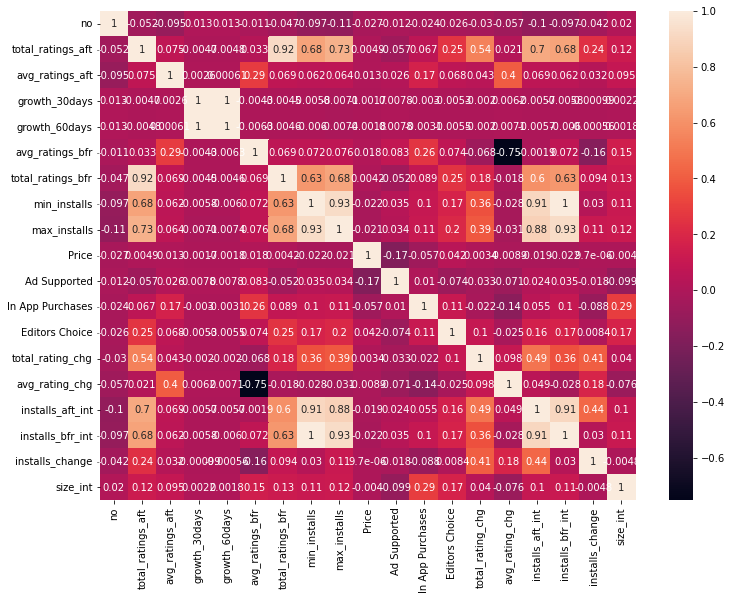

In [86]:
# 히트맵 상관관계 분석
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(df_9.corr(), annot=True)
plt.show()

In [87]:
# 데이터프레임 엑셀 변환
df_10.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_10.xlsx')

0    5118
1     165
Name: sv_end_stat, dtype: int64


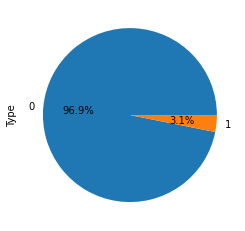

In [88]:
# independent variable의 분포 확인
print(df_10['sv_end_stat'].value_counts())
df_10.groupby('sv_end_stat').size().plot(kind='pie', y='sv_end_stat', label='Type', autopct='%1.1f%%')

In [89]:
# 안드로이드 버전 컬럼값 숫자로 변환 후 다시 불러오기
df_11 = pd.read_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_new_3.2.xlsx')

In [90]:
df_11.head(5)

,no,total_ratings_aft,avg_ratings_aft,growth_30days,growth_60days,App Name,Category,avg_ratings_bfr,total_ratings_bfr,min_installs,...,Editors Choice,sv_end_stat,total_rating_chg,avg_rating_chg,installs_aft_int,installs_bfr_int,installs_change,size_int,update_term,min_android_int
0,0,30116467,3.72,0.016,0.029,Mobile Legends: Bang Bang,Action,4.1,26860860.0,100000000.0,...,False,0,3255607,-0.38,100000000,100000000.0,0,106000000.0,1683.0,4.1
1,1,21640230,4.22,0.013,0.058,Brawl Stars,Action,4.3,18066559.0,100000000.0,...,True,0,3573671,-0.08,100000000,100000000.0,0,147000000.0,890.0,4.3
2,2,15069841,4.64,0.007,0.015,Shadow Fight 2,Action,4.6,14291156.0,100000000.0,...,False,0,778685,0.04,100000000,100000000.0,0,142000000.0,2493.0,4.4
3,3,12989150,3.61,0.005,0.012,Among Us,Action,3.5,12022640.0,100000000.0,...,True,0,966510,0.11,100000000,100000000.0,0,110000000.0,1095.0,6.0
4,4,9854530,4.46,0.002,0.005,Temple Run 2,Action,4.2,9649311.0,500000000.0,...,True,0,205219,0.26,500000000,500000000.0,0,130000000.0,3058.0,4.4


In [91]:
# 소수점 있는 숫자들의 scale을 키움
df_11['avg_ratings_aft_scale_up'] = df_11.apply(lambda x: x.avg_ratings_aft * 100, axis='columns')
df_11['growth_30days_scale_up'] = df_11.apply(lambda x: x.growth_30days * 1000, axis='columns')
df_11['growth_60days_scale_up'] = df_11.apply(lambda x: x.growth_60days * 1000, axis='columns')
df_11['avg_rating_chg_scale_up'] = df_11.apply(lambda x: x.avg_rating_chg * 100, axis='columns')
df_11['min_android_int_scale_up'] = df_11.apply(lambda x: x.min_android_int * 10, axis='columns')

In [92]:
df_12 = df_11.drop(['avg_ratings_aft', 'avg_ratings_aft', 'avg_ratings_aft', 'avg_rating_chg', 'min_android_int'], axis=1)

In [93]:
df_12['avg_ratings_aft_scale_up']

0       372.0
1       422.0
2       464.0
3       361.0
4       446.0
        ...  
5278    409.0
5279      0.0
5280    391.0
5281    418.0
5282    420.0
Name: avg_ratings_aft_scale_up, Length: 5283, dtype: float64

In [94]:
df_12['growth_30days_scale_up']

0       16.0
1       13.0
2        7.0
3        5.0
4        2.0
        ... 
5278     3.0
5279     0.0
5280     0.0
5281    41.0
5282     2.0
Name: growth_30days_scale_up, Length: 5283, dtype: float64

In [95]:
df_12['growth_60days_scale_up']

0       29.0
1       58.0
2       15.0
3       12.0
4        5.0
        ... 
5278     9.0
5279     0.0
5280     3.0
5281    88.0
5282     4.0
Name: growth_60days_scale_up, Length: 5283, dtype: float64

In [96]:
df_12['avg_rating_chg_scale_up']

0       -38.0
1        -8.0
2         4.0
3        11.0
4        26.0
        ...  
5278     19.0
5279   -400.0
5280    391.0
5281     28.0
5282     60.0
Name: avg_rating_chg_scale_up, Length: 5283, dtype: float64

In [97]:
df_12['min_android_int_scale_up']

0       41.0
1       43.0
2       44.0
3       60.0
4       44.0
        ... 
5278    44.0
5279    50.0
5280    50.0
5281    50.0
5282    41.0
Name: min_android_int_scale_up, Length: 5283, dtype: float64

결측치 제거

In [98]:
df_13 = df_12.dropna(axis=0)

In [99]:
df_13.isnull().sum()

no                          0
total_ratings_aft           0
growth_30days               0
growth_60days               0
App Name                    0
Category                    0
avg_ratings_bfr             0
total_ratings_bfr           0
min_installs                0
max_installs                0
Price                       0
Developer Id                0
Released                    0
last_updated                0
Content Rating              0
Ad Supported                0
In App Purchases            0
Editors Choice              0
sv_end_stat                 0
total_rating_chg            0
installs_aft_int            0
installs_bfr_int            0
installs_change             0
size_int                    0
update_term                 0
avg_ratings_aft_scale_up    0
growth_30days_scale_up      0
growth_60days_scale_up      0
avg_rating_chg_scale_up     0
min_android_int_scale_up    0
dtype: int64

In [100]:
df_13.nunique()

no                          4586
total_ratings_aft           4551
growth_30days                180
growth_60days                272
App Name                    4586
Category                      34
avg_ratings_bfr               33
total_ratings_bfr           4317
min_installs                  19
max_installs                4564
Price                         11
Developer Id                2554
Released                    2418
last_updated                1193
Content Rating                 4
Ad Supported                   2
In App Purchases               2
Editors Choice                 2
sv_end_stat                    2
total_rating_chg            3758
installs_aft_int              10
installs_bfr_int              19
installs_change               78
size_int                     299
update_term                 2316
avg_ratings_aft_scale_up     231
growth_30days_scale_up       180
growth_60days_scale_up       272
avg_rating_chg_scale_up      527
min_android_int_scale_up      20
dtype: int

In [101]:
df_13.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_13.xlsx')

In [102]:
# 게임사, 게임명 삭제(각 행이 게임명, 게임사를 포함하므로)
df_14 = df_13.drop(['App Name', 'Developer Id'], axis=1)

범주형 변수 원핫인코딩

In [103]:
# 날짜 값 int 변환
df_14['Released'] = df_14['Released'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [104]:
# 날짜 값 int 변환
df_14['last_updated'] = df_14['last_updated'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [105]:
df_14.dtypes

no                            int64
total_ratings_aft             int64
growth_30days               float64
growth_60days               float64
Category                     object
avg_ratings_bfr             float64
total_ratings_bfr           float64
min_installs                float64
max_installs                  int64
Price                       float64
Released                      int64
last_updated                  int64
Content Rating               object
Ad Supported                   bool
In App Purchases               bool
Editors Choice                 bool
sv_end_stat                   int64
total_rating_chg              int64
installs_aft_int              int64
installs_bfr_int            float64
installs_change               int64
size_int                    float64
update_term                 float64
avg_ratings_aft_scale_up    float64
growth_30days_scale_up      float64
growth_60days_scale_up      float64
avg_rating_chg_scale_up     float64
min_android_int_scale_up    

In [106]:
# 카테고리 고유값(범주값) 확인
df_14['Category'].unique()

array(['Action', 'Arcade', 'Simulation', 'Casual', 'Adventure',
       'Education', 'Communication', 'Word', 'Personalization',
       'Role Playing', 'Weather', 'Travel & Local', 'Health & Fitness',
       'Tools', 'Maps & Navigation', 'Puzzle', 'Racing', 'Music', 'Board',
       'Casino', 'Entertainment', 'Sports', 'Strategy', 'Business',
       'Card', 'Educational', 'Art & Design', 'Shopping', 'Productivity',
       'Parenting', 'Music & Audio', 'Trivia', 'Lifestyle',
       'Books & Reference'], dtype=object)

In [107]:
# 콘텐츠 등급 고유값(범주값) 확인
df_14['Content Rating'].unique()

array(['Teen', 'Everyone 10+', 'Everyone', 'Mature 17+'], dtype=object)

In [108]:
# 광고 협찬 여부 고유값(범주값) 확인
df_14['Ad Supported'].unique()

array([ True, False])

In [109]:
# 인앱 결제 여부 고유값(범주값) 확인
df_14['In App Purchases'].unique()

array([ True, False])

In [110]:
# 에디터 초이스 여부 고유값(범주값) 확인
df_14['Editors Choice'].unique()

array([False,  True])

In [111]:
# 범주형 변수 원핫인코딩
categorical = ['Category', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']
df_15 = pd.get_dummies(df_14, columns = categorical, prefix = ['category', 'content_rating', 'ad_supported', 'in_app_purchases', 'editors_choice'], drop_first = True)

In [112]:
df_15.head(5)

,no,total_ratings_aft,growth_30days,growth_60days,avg_ratings_bfr,total_ratings_bfr,min_installs,max_installs,Price,Released,...,category_Travel & Local,category_Trivia,category_Weather,category_Word,content_rating_Everyone 10+,content_rating_Mature 17+,content_rating_Teen,ad_supported_True,in_app_purchases_True,editors_choice_True
0,0,30116467,0.016,0.029,4.1,26860860.0,100000000.0,416373512,0.0,1477872000000000000,...,0,0,0,0,0,0,1,1,1,0
1,1,21640230,0.013,0.058,4.3,18066559.0,100000000.0,238450421,0.0,1544572800000000000,...,0,0,0,0,1,0,0,0,1,1
2,2,15069841,0.007,0.015,4.6,14291156.0,100000000.0,298137172,0.0,1405987200000000000,...,0,0,0,0,1,0,0,1,1,0
3,3,12989150,0.005,0.012,3.5,12022640.0,100000000.0,405542120,0.0,1529020800000000000,...,0,0,0,0,1,0,0,1,1,1
4,4,9854530,0.002,0.005,4.2,9649311.0,500000000.0,837218010,0.0,1358899200000000000,...,0,0,0,0,0,0,0,1,1,1


In [113]:
df_15.columns

Index(['no', 'total_ratings_aft', 'growth_30days', 'growth_60days',
       'avg_ratings_bfr', 'total_ratings_bfr', 'min_installs', 'max_installs',
       'Price', 'Released', 'last_updated', 'sv_end_stat', 'total_rating_chg',
       'installs_aft_int', 'installs_bfr_int', 'installs_change', 'size_int',
       'update_term', 'avg_ratings_aft_scale_up', 'growth_30days_scale_up',
       'growth_60days_scale_up', 'avg_rating_chg_scale_up',
       'min_android_int_scale_up', 'category_Adventure', 'category_Arcade',
       'category_Art & Design', 'category_Board', 'category_Books & Reference',
       'category_Business', 'category_Card', 'category_Casino',
       'category_Casual', 'category_Communication', 'category_Education',
       'category_Educational', 'category_Entertainment',
       'category_Health & Fitness', 'category_Lifestyle',
       'category_Maps & Navigation', 'category_Music',
       'category_Music & Audio', 'category_Parenting',
       'category_Personalization', 'categ

In [114]:
df_15.to_excel('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_15.xlsx')

In [115]:
df_16 = df_15.drop(['growth_30days', 'growth_60days', 'avg_ratings_bfr', 'no'], axis=1)

In [116]:
df_17 = df_16.astype(int)

In [117]:
df_17.dtypes

total_ratings_aft              int64
total_ratings_bfr              int64
min_installs                   int64
max_installs                   int64
Price                          int64
Released                       int64
last_updated                   int64
sv_end_stat                    int64
total_rating_chg               int64
installs_aft_int               int64
installs_bfr_int               int64
installs_change                int64
size_int                       int64
update_term                    int64
avg_ratings_aft_scale_up       int64
growth_30days_scale_up         int64
growth_60days_scale_up         int64
avg_rating_chg_scale_up        int64
min_android_int_scale_up       int64
category_Adventure             int64
category_Arcade                int64
category_Art & Design          int64
category_Board                 int64
category_Books & Reference     int64
category_Business              int64
category_Card                  int64
category_Casino                int64
c

데이터 스케일링 / 차원축소

In [118]:
df_raw = df_17.copy()

In [119]:
# 데이터 스케일링 실행 함수
def run_scale(method, data) :
  if method == 'minmax' :
    scaler = MinMaxScaler()
  else :
    scaler = StandardScaler()
  scaled_data = pd.DataFrame(scaler.fit_transform(data))
  
  return scaled_data

In [120]:
# KernelPCA 실행 함수
def run_pca(data, n_components, kernel='linear'):
    scaled_data = run_scale('minmax', data)

    pca = KernelPCA(n_components = n_components, kernel = kernel)
    pca_result = pca.fit_transform(scaled_data)

    return pd.DataFrame(pca_result)

In [121]:
df_raw_X = df_raw.drop('sv_end_stat', axis=1)
df_raw_y = df_raw['sv_end_stat']

# PCA 진행
# df_raw_X_lin = run_pca(df_raw_X, 10, 'linear')
# df_raw_X_rbf = run_pca(df_raw_X, 10, 'rbf')

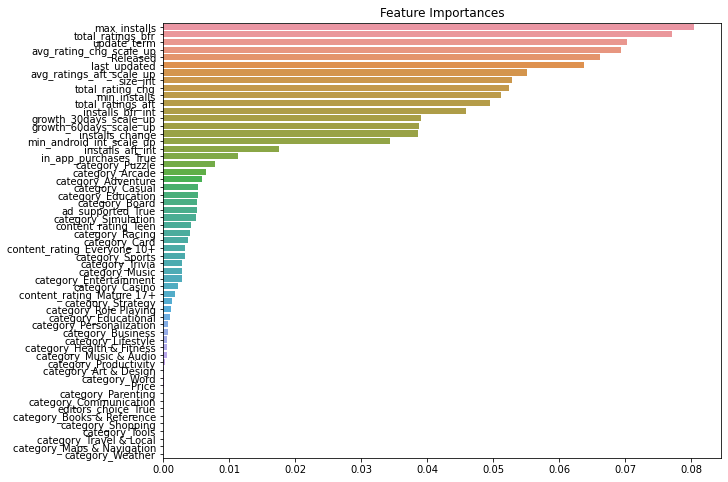

In [122]:
# df_raw로 진행

scaled_df_raw_X = run_scale('standard', df_raw_X)

rf_raw = RandomForestClassifier(random_state = 55)
rf_raw.fit(scaled_df_raw_X, df_raw_y)

ftr_importances_values = rf_raw.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df_raw_X.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index)

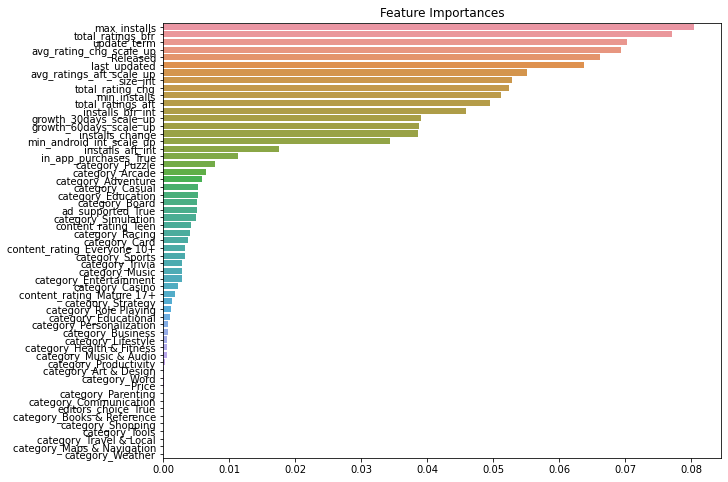

In [123]:
# df_raw로 진행(xgboost selection 진행)

scaled_df_raw_X = run_scale('standard', df_raw_X)

xgb_raw = RandomForestClassifier(random_state = 55)
xgb_raw.fit(scaled_df_raw_X, df_raw_y)

ftr_importances_values = xgb_raw.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = df_raw_X.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index)

In [ ]:
# 'max_installs', 'total_ratings_bfr', 'update_term', 'avg_rating_chg_scale_up', 'size_int', 'total_rating_chg', 'min_installs', 'total_ratings_aft', 'installs_bfr_int'

샘플링 진행

Train / Test Set 분류

In [124]:
# Train, Test Set 생성 함수
def make_set(X, y, ratio = 0.2) :
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = ratio, random_state = 123)

  train_X = np.array(train_X).astype(np.float32)
  test_X = np.array(test_X).astype(np.float32)
  train_y = np.array(train_y).astype(np.float32)
  test_y = np.array(test_y).astype(np.float32)

  return train_X, test_X, train_y, test_y

In [125]:
train_X, test_X, train_y, test_y = make_set(df_raw_X, df_raw_y, 0.2)

In [126]:
# 샘플링 기법 적용 함수
def make_sample(X, y, sample) :
  if sample == 'ROS' : # 랜덤오버샘플링 적용
    X_os, y_os = RandomOverSampler(random_state = 0).fit_resample(X, y)
  elif sample == 'SMOTE' : # SMOTE 적용
    X_os, y_os = SMOTE(random_state=4).fit_resample(X, y)
  elif sample == 'ADASYN' : # ADASYN 적용
    X_os, y_os = ADASYN(random_state=0).fit_resample(X, y)
  elif sample == 'SMOTE+ENN' : # SMOTE+ENN 적용
    X_os, y_os = SMOTEENN(random_state=0).fit_resample(X, y)
  elif sample == 'SMOTE+Tomek' :
    X_os, y_os = SMOTETomek(random_state=4).fit_resample(X, y)

  return X_os, y_os

In [127]:
X_ros, y_ros = make_sample(train_X, train_y, 'ROS')
X_smo, y_smo = make_sample(train_X, train_y, 'SMOTE')
X_ada, y_ada = make_sample(train_X, train_y, 'ADASYN')
X_sme, y_sme = make_sample(train_X, train_y, 'SMOTE+ENN')
X_smt, y_smt = make_sample(train_X, train_y, 'SMOTE+Tomek')

In [128]:
print('RandomOverSampler 적용 후 학습용 피처/레이블 데이터 세트: ', X_ros.shape, y_ros.shape)
print('RandomOverSampler 적용 후 레이블 값 분포: \n', pd.Series(y_ros).value_counts(), '\n')
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_smo.shape, y_smo.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_smo).value_counts(), '\n')
print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', X_ada.shape, y_ada.shape)
print('ADASYN 적용 후 레이블 값 분포: \n', pd.Series(y_ada).value_counts(), '\n')
print('SMOTE+ENN 적용 후 학습용 피처/레이블 데이터 세트: ', X_sme.shape, y_sme.shape)
print('SMOTE+ENN 적용 후 레이블 값 분포: \n', pd.Series(y_sme).value_counts(), '\n')
print('SMOTE+Tomek 적용 후 학습용 피처/레이블 데이터 세트: ', X_smt.shape, y_smt.shape)
print('SMOTE+Tomek 적용 후 레이블 값 분포: \n', pd.Series(y_smt).value_counts())

RandomOverSampler 적용 후 학습용 피처/레이블 데이터 세트:  (7098, 57) (7098,)
RandomOverSampler 적용 후 레이블 값 분포: 
 0.0    3549
1.0    3549
dtype: int64 

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7098, 57) (7098,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    3549
1.0    3549
dtype: int64 

ADASYN 적용 후 학습용 피처/레이블 데이터 세트:  (7132, 57) (7132,)
ADASYN 적용 후 레이블 값 분포: 
 1.0    3583
0.0    3549
dtype: int64 

SMOTE+ENN 적용 후 학습용 피처/레이블 데이터 세트:  (5220, 57) (5220,)
SMOTE+ENN 적용 후 레이블 값 분포: 
 0.0    2632
1.0    2588
dtype: int64 

SMOTE+Tomek 적용 후 학습용 피처/레이블 데이터 세트:  (6608, 57) (6608,)
SMOTE+Tomek 적용 후 레이블 값 분포: 
 0.0    3304
1.0    3304
dtype: int64


모델링

In [129]:
# 모델 정확도 확인 함수 정의

def print_score(true, pred, train = True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [130]:
# Lasso 계산 함수

def grid_lasso(train_X, train_y, test_X, test_y) :
  lambda_list = [5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
  #thres_list = [0.3, 0.4, 0.5, 0.6, 0.7]
  thres_list = [0.5]
  max_acc = 0
  #max_recall = 0
  max_alpha = 0
  max_threshold = 0

  for value in lambda_list :
    # 모델 생성 및 학습
    lasso_model = Lasso(alpha = value)
    lasso_model.fit(train_X, train_y)
      
    # Test 데이터 예측
    test_y_pred = lasso_model.predict(test_X)

    for thres in thres_list :
      # threshold 값 기준으로 y값 0 / 1로 분류
      Y = test_y_pred.copy()
      Y[Y > thres] = 1
      Y[Y <= thres] = 0
      Y.astype(int)
      
      # Confusion matrix 생성 후 정확도 확인
      cfmat = confusion_matrix(test_y, Y)
      acc = (cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)
      #recall = cfmat[1, 1] / (cfmat[1, 0] + cfmat[1, 1])

      if acc > max_acc :
        max_acc = acc
        max_alpha = value
        max_threshold = thres
    
    return max_alpha, max_threshold, max_acc

In [131]:
# Ridge 계산 함수

def grid_ridge(train_X, train_y, test_X, test_y) :
  lambda_list = [5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
  #thres_list = [0.3, 0.4, 0.5, 0.6, 0.7]
  thres_list = [0.5]
  max_acc = 0
  #max_recall = 0
  max_alpha = 0
  max_threshold = 0

  for value in lambda_list :
    # 모델 생성 및 학습
    ridge_model = Ridge(alpha = value)
    ridge_model.fit(train_X, train_y)
      
    # Test 데이터 예측
    test_y_pred = ridge_model.predict(test_X)

    for thres in thres_list :
      # threshold 값 기준으로 y값 0 / 1로 분류
      Y = test_y_pred.copy()
      Y[Y > thres] = 1
      Y[Y <= thres] = 0
      Y.astype(int)
      
      # Confusion matrix 생성 후 정확도 확인
      cfmat = confusion_matrix(test_y, Y)
      acc = (cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)
      #recall = cfmat[1, 1] / (cfmat[1, 0] + cfmat[1, 1])

      if acc > max_acc :
        max_acc = acc
        max_alpha = value
        max_threshold = thres
    
    return max_alpha, max_threshold, max_acc

In [132]:
def grid_dt(train_X, train_y, scoring = 'accuracy') :
  estimator_dt = DecisionTreeClassifier()

  param_grid_dt = {'max_depth' : [6, 8, 10],
                  'max_features' : [None, 'auto'],
                  'min_samples_split' : [4, 6, 8],
                  'random_state' : [55]
                  }

  grid_dt = GridSearchCV(estimator_dt, param_grid = param_grid_dt, scoring = scoring, n_jobs = -1)
  grid_dt.fit(train_X, train_y)

  print(grid_dt.best_params_)
  print(grid_dt.best_score_)

  return grid_dt.best_params_, grid_dt.best_score_

In [133]:
def grid_rf(train_X, train_y, scoring = 'accuracy') :
  estimator_rf = RandomForestClassifier()

  param_grid_rf = {'n_estimators' : [10, 50, 100],
                  'max_depth' : [6, 8, 10],
                  'max_features' : [None, 'auto'],
                  'min_samples_split' : [4, 6, 8],
                  'random_state' : [55]
                  }

  grid_rf = GridSearchCV(estimator_rf, param_grid = param_grid_rf, scoring = scoring, n_jobs = -1)
  grid_rf.fit(train_X, train_y)

  print(grid_rf.best_params_)
  print(grid_rf.best_score_)

  return grid_rf.best_params_, grid_rf.best_score_

In [134]:
def grid_xgb(train_X, train_y, scoring = 'accuracy') :
  estimator_xgb = XGBClassifier()

  param_grid_xgb = {'n_estimators' : [10, 50, 100],
                    'learning_rate' : [0.01, 0.1, 0.2],
                    'max_depth' : [6, 8, 10],
                    'gamma' : [0.01, 0.1, 1],
                    'random_satate' : [55]
                    }
  grid_xgb = GridSearchCV(estimator_xgb, param_grid = param_grid_xgb, scoring = scoring, n_jobs = -1)
  grid_xgb.fit(train_X, train_y)

  print(grid_xgb.best_params_)
  print(grid_xgb.best_score_)

  return grid_xgb.best_params_, grid_xgb.best_score_

In [135]:
def grid_lgb(train_X, train_y, scoring = 'accuracy') :
  estimator_lgb = LGBMClassifier()

  param_grid_lgb = {'n_estimators' : [50, 100],
                    'learning_rate' : [0.01,0.1, 0.2],
                    'max_depth' : [8, 10, 12],
                    'num_leaves' : [30, 40, 50],
                    'random_state' : [55]
                    }

  grid_lgb = GridSearchCV(estimator_lgb, param_grid = param_grid_lgb, scoring = scoring, n_jobs = -1)
  grid_lgb.fit(train_X, train_y)

  print(grid_lgb.best_params_)
  print(grid_lgb.best_score_)

  return grid_lgb.best_params_, grid_lgb.best_score_

정확도 비교

In [136]:
df_set = ['df_raw']
sampling = ['ROS', 'SMOTE', 'ADASYN', 'SMOTE+ENN', 'SMOTE+Tomek']

In [137]:
df_acc_lr = pd.DataFrame(columns = ['Data_Set', 'Sampling', 'Classifier', 'Alpha', 'Threshold', 'Accuracy'])

for st in df_set :
  print('===Data Set : ' + st)
  if st == 'df_raw' :
    df_X = df_raw.drop('sv_end_stat', axis=1)
    df_y = df_raw['sv_end_stat']
  
  
  scaled_X = run_scale('standard', df_X)
  train_X, test_X, train_y, test_y = make_set(scaled_X, df_y, 0.2)
  
  for sam in sampling :
    print('===Sampling : ' + sam, '\n')
    train_X_os, train_y_os = make_sample(train_X, train_y, sam)

    print('Modeling : Lasso')
    max_alpha, max_threshold, max_acc = grid_lasso(train_X_os, train_y_os, test_X, test_y)
    df_acc_lr = df_acc_lr.append({'Data_Set' : st, 'Sampling' : sam, 'Classifier' : 'Lasso', 'Alpha' : max_alpha, 'Threshold' : max_threshold, 'Accuracy' : max_acc} , ignore_index=True) 
    print('Modeling : Ridge')
    max_alpha, max_threshold, max_acc = grid_ridge(train_X_os, train_y_os, test_X, test_y)
    df_acc_lr = df_acc_lr.append({'Data_Set' : st, 'Sampling' : sam, 'Classifier' : 'Ridge', 'Alpha' : max_alpha, 'Threshold' : max_threshold, 'Accuracy' : max_acc} , ignore_index=True) 
    print('')

===Data Set : df_raw
===Sampling : ROS 

Modeling : Lasso
Modeling : Ridge

===Sampling : SMOTE 

Modeling : Lasso
Modeling : Ridge

===Sampling : ADASYN 

Modeling : Lasso
Modeling : Ridge

===Sampling : SMOTE+ENN 

Modeling : Lasso
Modeling : Ridge

===Sampling : SMOTE+Tomek 

Modeling : Lasso
Modeling : Ridge



In [138]:
df_acc_lr.to_csv('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_acc_lr.csv', index = False)

In [139]:
df_acc_lr[df_acc_lr['Accuracy'] == df_acc_lr['Accuracy'].max(axis=0)]

,Data_Set,Sampling,Classifier,Alpha,Threshold,Accuracy
0,df_raw,ROS,Lasso,5,0.5,0.959695
2,df_raw,SMOTE,Lasso,5,0.5,0.959695
4,df_raw,ADASYN,Lasso,5,0.5,0.959695
8,df_raw,SMOTE+Tomek,Lasso,5,0.5,0.959695


#### (2) Decision Tree, Random Forest, SVC, XGBoost, LGBM - 1
  - Data Set / PCA 차원 수 / Kernel / 샘플링기법 / 모델링 별 GridSearch를 통해 최적의 하이퍼파라미터를 도출 후 df_acc에 저장

In [140]:
df_set = ['df_raw']
components = [5, 10, 15]
kernels = ['linear', 'rbf']
sampling = ['ROS', 'SMOTE', 'ADASYN', 'SMOTE+ENN', 'SMOTE+Tomek']
scoring = 'accuracy'

In [141]:
df_acc = pd.DataFrame(columns = ['Data_Set', 'Componenet', 'Kernel', 'Sampling', 'Classifier', 'Parameter', 'Score'])

for st in df_set :
  print('=== Data Set : ' + st)
  if st == 'df_raw' :
    df_X = df_raw.drop('sv_end_stat', axis=1)
    df_y = df_raw['sv_end_stat']
  
  for con in components :
    print('=== Components : ' + str(con))
    for ker in kernels :
      print('=== Kernels : ' + ker)
      df_X2 = run_pca(df_X, con, ker)

      train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)
      
      for sam in sampling :
        print('=== Sampling : ' + sam, '\n')
        train_X_os, train_y_os = make_sample(train_X, train_y, sam)

        print('Modeling : Decision Tree')
        grid_dt_param, grid_dt_score = grid_dt(train_X_os, train_y_os, scoring)
        df_acc = df_acc.append({'Data_Set' : st, 'Componenet' : con, 'Kernel' : ker, 'Sampling' : sam, 'Classifier' : 'Decision Tree', 'Parameter' : grid_dt_param, 'Score' : grid_dt_score} , ignore_index=True) 
        print('Modeling : Random Forest')
        grid_rf_param, grid_rf_score = grid_rf(train_X_os, train_y_os, scoring)
        df_acc = df_acc.append({'Data_Set' : st, 'Componenet' : con, 'Kernel' : ker, 'Sampling' : sam, 'Classifier' : 'Random Forest', 'Parameter' : grid_rf_param, 'Score' : grid_rf_score} , ignore_index=True)
        # print('Modeling : SVC')
        # grid_svc_param, grid_svc_score = grid_svc(train_X_os, train_y_os, scoring)
        # df_acc = df_acc.append({'Data_Set' : st, 'Componenet' : con, 'Kernel' : ker, 'Sampling' : sam, 'Classifier' : 'SVC', 'Parameter' : grid_svc_param, 'Score' : grid_svc_score} , ignore_index=True)
        print('Modeling : XGBoost')
        grid_xgb_param, grid_xgb_score = grid_xgb(train_X_os, train_y_os, scoring)
        df_acc = df_acc.append({'Data_Set' : st, 'Componenet' : con, 'Kernel' : ker, 'Sampling' : sam, 'Classifier' : 'XGBoost', 'Parameter' : grid_xgb_param, 'Score' : grid_xgb_score} , ignore_index=True)
        print('Modeling : LGBM')
        grid_lgb_param, grid_lgb_score = grid_lgb(train_X_os, train_y_os, scoring)
        df_acc = df_acc.append({'Data_Set' : st, 'Componenet' : con, 'Kernel' : ker, 'Sampling' : sam, 'Classifier' : 'LGBM', 'Parameter' : grid_lgb_param, 'Score' : grid_lgb_score} , ignore_index=True)
        print('')

=== Data Set : df_raw
=== Components : 5
=== Kernels : linear
=== Sampling : ROS 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'random_state': 55}
0.95069092497196
Modeling : Random Forest
{'max_depth': 10, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 55}
0.9551974709426396
Modeling : XGBoost
{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'random_satate': 55}
0.9866152517642854
Modeling : LGBM
{'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'num_leaves': 50, 'random_state': 55}
0.9891506615450277

=== Sampling : SMOTE 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': None, 'min_samples_split': 6, 'random_state': 55}
0.9095510625415638
Modeling : Random Forest
{'max_depth': 10, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 55}
0.932515359953945
Modeling : XGBoost
{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, '

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'num_leaves': 40, 'random_state': 55}
0.9904195575142186

=== Sampling : SMOTE 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': None, 'min_samples_split': 4, 'random_state': 55}
0.9216668155515191
Modeling : Random Forest
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 55}
0.9433628125341194
Modeling : XGBoost
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'random_satate': 55}
0.9646376638974085
Modeling : LGBM
{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 40, 'random_state': 55}
0.9652007464093938

=== Sampling : ADASYN 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': None, 'min_samples_split': 4, 'random_state': 55}
0.8680797808080728
Modeling : Random Forest
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 55}
0.89196269947176
Modeling

In [143]:
df_acc.to_csv('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_acc.csv', index = False)

In [144]:
df_acc[df_acc['Score'] == df_acc[df_acc['Classifier'] == 'Decision Tree']['Score'].max(axis=0)]

,Data_Set,Componenet,Kernel,Sampling,Classifier,Parameter,Score
52,df_raw,10,linear,SMOTE+ENN,Decision Tree,"{'max_depth': 10, 'max_features': None, 'min_s...",0.96388


In [145]:
df_acc[df_acc['Score'] == df_acc[df_acc['Classifier'] == 'Random Forest']['Score'].max(axis=0)]

,Data_Set,Componenet,Kernel,Sampling,Classifier,Parameter,Score
93,df_raw,15,linear,SMOTE+ENN,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.980385


In [146]:
# df_acc[df_acc['Score'] == df_acc[df_acc['Classifier'] == 'SVC']['Score'].max(axis=0)]

,Data_Set,Componenet,Kernel,Sampling,Classifier,Parameter,Score


In [147]:
df_acc[df_acc['Score'] == df_acc[df_acc['Classifier'] == 'XGBoost']['Score'].max(axis=0)]

,Data_Set,Componenet,Kernel,Sampling,Classifier,Parameter,Score
94,df_raw,15,linear,SMOTE+ENN,XGBoost,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",0.992154


In [148]:
df_acc[df_acc['Score'] == df_acc[df_acc['Classifier'] == 'LGBM']['Score'].max(axis=0)]

,Data_Set,Componenet,Kernel,Sampling,Classifier,Parameter,Score
95,df_raw,15,linear,SMOTE+ENN,LGBM,"{'learning_rate': 0.2, 'max_depth': 12, 'n_est...",0.994978


feature importance

In [149]:
df_set = ['df_raw']    # 결측값을 채운 feature가 선택된 9개의 feature 중 존재하지 않기 때문에 1가지 데이터셋만 사용
sampling = ['ROS', 'SMOTE', 'ADASYN', 'SMOTE+ENN', 'SMOTE+Tomek']
scoring = 'accuracy'
selected_feature =  ['max_installs', 'total_ratings_bfr', 'update_term', 'avg_rating_chg_scale_up', 'size_int', 'total_rating_chg', 'min_installs', 'total_ratings_aft', 'installs_bfr_int']

In [150]:
df_acc2 = pd.DataFrame(columns = ['Data_Set', 'Sampling', 'Classifier', 'Parameter', 'Score'])

for st in df_set :
  print('=== Data Set : df')
  if st == 'df_raw' :
    df_X = df_raw.drop('sv_end_stat', axis=1)
    df_y = df_raw['sv_end_stat']
  
  df_X2 = df_X[selected_feature]
  train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)
  
  for sam in sampling :
    print('=== Sampling : ' + sam, '\n')
    train_X_os, train_y_os = make_sample(train_X, train_y, sam)

    print('Modeling : Decision Tree')
    grid_dt_param, grid_dt_score = grid_dt(train_X_os, train_y_os, scoring)
    df_acc2 = df_acc2.append({'Data_Set' : 'df', 'Sampling' : sam, 'Classifier' : 'Decision Tree', 'Parameter' : grid_dt_param, 'Score' : grid_dt_score} , ignore_index=True) 
    print('Modeling : Random Forest')
    grid_rf_param, grid_rf_score = grid_rf(train_X_os, train_y_os, scoring)
    df_acc2 = df_acc2.append({'Data_Set' : 'df', 'Sampling' : sam, 'Classifier' : 'Random Forest', 'Parameter' : grid_rf_param, 'Score' : grid_rf_score} , ignore_index=True)
    # print('Modeling : SVC')
    # grid_svc_param, grid_svc_score = grid_svc(train_X_os, train_y_os, scoring)
    # df_acc2 = df_acc2.append({'Data_Set' : st, 'Sampling' : sam, 'Classifier' : 'SVC', 'Parameter' : grid_svc_param, 'Score' : grid_svc_score} , ignore_index=True)
    print('Modeling : XGBoost')
    grid_xgb_param, grid_xgb_score = grid_xgb(train_X_os, train_y_os, scoring)
    df_acc2 = df_acc2.append({'Data_Set' : 'df', 'Sampling' : sam, 'Classifier' : 'XGBoost', 'Parameter' : grid_xgb_param, 'Score' : grid_xgb_score} , ignore_index=True)
    print('Modeling : LGBM')
    grid_lgb_param, grid_lgb_score = grid_lgb(train_X_os, train_y_os, scoring)
    df_acc2 = df_acc2.append({'Data_Set' : 'df', 'Sampling' : sam, 'Classifier' : 'LGBM', 'Parameter' : grid_lgb_param, 'Score' : grid_lgb_score} , ignore_index=True)
    print('')

=== Data Set : df
=== Sampling : ROS 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': None, 'min_samples_split': 4, 'random_state': 55}
0.959000585613753
Modeling : Random Forest
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 55}
0.9744990024714886
Modeling : XGBoost
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'random_satate': 55}
0.9887280270771918
Modeling : LGBM
{'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'num_leaves': 50, 'random_state': 55}
0.9912640323973438

=== Sampling : SMOTE 

Modeling : Decision Tree
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'random_state': 55}
0.9426624581881704
Modeling : Random Forest
{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 55}
0.9585797377641466
Modeling : XGBoost
{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'random_satate'

In [151]:
df_acc2.to_csv('/content/drive/MyDrive/Python_SNU/mobilegame_analysis/df_acc2.csv', index = False)

In [152]:
df_acc2[df_acc2['Score'] == df_acc2[df_acc2['Classifier'] == 'Decision Tree']['Score'].max(axis=0)]

,Data_Set,Sampling,Classifier,Parameter,Score
12,df,SMOTE+ENN,Decision Tree,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.979854


In [153]:
df_acc2[df_acc2['Score'] == df_acc2[df_acc2['Classifier'] == 'Random Forest']['Score'].max(axis=0)]

,Data_Set,Sampling,Classifier,Parameter,Score
13,df,SMOTE+ENN,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min...",0.98798


In [154]:
df_acc2[df_acc2['Score'] == df_acc2[df_acc2['Classifier'] == 'XGBoost']['Score'].max(axis=0)]

,Data_Set,Sampling,Classifier,Parameter,Score
14,df,SMOTE+ENN,XGBoost,"{'gamma': 0.1, 'learning_rate': 0.2, 'max_dept...",0.990181


In [155]:
df_acc2[df_acc2['Score'] == df_acc2[df_acc2['Classifier'] == 'LGBM']['Score'].max(axis=0)]

,Data_Set,Sampling,Classifier,Parameter,Score
15,df,SMOTE+ENN,LGBM,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.991366


test set을 통한 최종 정확도 확인

In [156]:
# 데이터 Set 생성 : df_raw
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']
scaled_X = run_scale('standard', df_X)
train_X, test_X, train_y, test_y = make_set(scaled_X, df_y, 0.2)

# 샘플링 : SMOTE
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE')

# Ridge로 분류 모델 생성. lambda값 10
clf_lr = Ridge(alpha = 5)
clf_lr.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_lr.predict(test_X)

In [157]:
# threshold 값의 변화에 따른 정확도와 검정력 확인

threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  #print('=================== Threshold : ' + str(thres) + ' ===================')
  test_y_pred_prob = np.zeros(len(test_y_pred))

  for i in range(len(test_y_pred)) :
    if test_y_pred[i] > thres :
      test_y_pred_prob[i] = 1
  
  tp = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fn = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fp = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tn = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tn / (fp + tn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

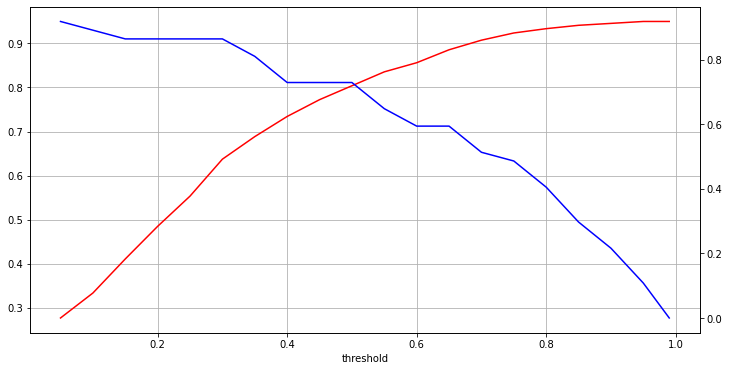

In [158]:
# 시각화 : threshold = 0.45로 최종 결정

fig, ax1 = plt.subplots(figsize = (12, 6))
ax2 = ax1.twinx()

lns1 = ax1.plot(df_thres.index, df_thres['accuracy'], label = 'accuracy', color = 'red')
lns2 = ax2.plot(df_thres.index, df_thres['recall'], label = 'recall', color = 'blue')
lns = lns1 + lns2
ax1.legend

ax1.grid()
ax1.set_xlabel('threshold')
plt.show()

In [159]:
test_y_pred_prob = np.zeros(len(test_y_pred))

for i in range(len(test_y_pred)) :
  if test_y_pred[i] > 0.45 :
    test_y_pred_prob[i] = 1

tp = confusion_matrix(test_y, test_y_pred_prob)[0][0]
fn = confusion_matrix(test_y, test_y_pred_prob)[0][1]
fp = confusion_matrix(test_y, test_y_pred_prob)[1][0]
tn = confusion_matrix(test_y, test_y_pred_prob)[1][1]

accuracy = (tp + tn) / (tp + fn + fp + tn)
recall = tn / (fp + tn)

print(f"예측 정확도 : {accuracy * 100:.2f}%")
print(f"모델 검정력 : {recall * 100:.2f}%")

예측 정확도 : 77.23%
모델 검정력 : 72.97%


In [160]:
# 데이터 Set 생성 : df_med
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# 차원축소 진행 : componets = 15, kernel = linear
df_X2 = run_pca(df_X, 15, 'linear')
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : SMOTE+ENN
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE+ENN')

# 분류모델 생성
clf_dt1 = DecisionTreeClassifier(max_depth = 10, max_features = None, min_samples_split = 4, random_state = 55)
clf_dt1.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_dt1.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 85.51%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.978261   0.147059   0.85512    0.562660      0.944759
recall       0.868331   0.540541   0.85512    0.704436      0.855120
f1-score     0.920024   0.231214   0.85512    0.575619      0.892262
support    881.000000  37.000000   0.85512  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[765 116]
 [ 17  20]]



In [161]:
# 데이터 Set 생성
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# Feature 추출
df_X2 = df_X[selected_feature]
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'ROS')

# 분류모델 생성
clf_dt2 = DecisionTreeClassifier(max_depth = 10, max_features = None, min_samples_split = 4, random_state = 55)
clf_dt2.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_dt2.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 92.27%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.977594   0.257143  0.922658    0.617369      0.948557
recall       0.940976   0.486486  0.922658    0.713731      0.922658
f1-score     0.958936   0.336449  0.922658    0.647692      0.933846
support    881.000000  37.000000  0.922658  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[829  52]
 [ 19  18]]



In [163]:
# 데이터 Set 생성 : df_med
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# 차원축소 진행 : componets = 15, kernel = linear
df_X2 = run_pca(df_X, 15, 'linear')
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : SMOTE+ENN
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE+ENN')

# 분류모델 생성
clf_rf1 = RandomForestClassifier(max_depth = 10, max_features = 'auto', min_samples_split = 6, n_estimators = 100, random_state = 55)
clf_rf1.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_rf1.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.977157   0.146154  0.859477    0.561656      0.943664
recall       0.874007   0.513514  0.859477    0.693760      0.859477
f1-score     0.922708   0.227545  0.859477    0.575127      0.894690
support    881.000000  37.000000  0.859477  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[770 111]
 [ 18  19]]



In [164]:
# 데이터 Set 생성
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# Feature 추출
df_X2 = df_X[selected_feature]
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'ROS')

# 분류모델 생성
clf_rf2 = RandomForestClassifier(max_depth = 10, max_features = 'auto', min_samples_split = 4, n_estimators = 100, random_state = 55)
clf_rf2.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_dt2.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 92.27%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.977594   0.257143  0.922658    0.617369      0.948557
recall       0.940976   0.486486  0.922658    0.713731      0.922658
f1-score     0.958936   0.336449  0.922658    0.647692      0.933846
support    881.000000  37.000000  0.922658  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[829  52]
 [ 19  18]]



In [166]:
# 데이터 Set 생성 : df_med
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# 차원축소 진행 : componets = 15, kernel = linear
df_X2 = run_pca(df_X, 15, 'linear')
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : SMOTE+ENN
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE+ENN')

# 분류모델 생성
clf_svc = SVC(C = 10, gamma = 1, kernel = 'rbf')
clf_svc.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_svc.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 86.06%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.974779   0.136000  0.860566    0.555390      0.940972
recall       0.877412   0.459459  0.860566    0.668436      0.860566
f1-score     0.923536   0.209877  0.860566    0.566706      0.894772
support    881.000000  37.000000  0.860566  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[773 108]
 [ 20  17]]



In [167]:
# 데이터 Set 생성 : df_med
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# 차원축소 진행 : componets = 15, kernel = rbf
df_X2 = run_pca(df_X, 15, 'rbf')
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'ROS')

# 분류모델 생성
clf_xg1 = XGBClassifier(gamma = 0.1, learning_rate = 0.2, max_depth = 10, n_estimators = 100, random_satate = 55)
clf_xg1.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_xg1.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 95.21%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.963455   0.266667   0.95207    0.615061      0.935371
recall       0.987514   0.108108   0.95207    0.547811      0.952070
f1-score     0.975336   0.153846   0.95207    0.564591      0.942226
support    881.000000  37.000000   0.95207  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[870  11]
 [ 33   4]]



In [168]:
# 데이터 Set 생성
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# Feature 추출
df_X2 = df_X[selected_feature]
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE+ENN')

# 분류모델 생성
clf_xg2 = XGBClassifier(gamma = 0.1, learning_rate = 0.2, max_depth = 6, n_estimators = 100, random_satate = 55)
clf_xg2.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_xg2.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 91.72%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.983193   0.270588  0.917211    0.626891      0.954472
recall       0.929625   0.621622  0.917211    0.775624      0.917211
f1-score     0.955659   0.377049  0.917211    0.666354      0.932338
support    881.000000  37.000000  0.917211  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[819  62]
 [ 14  23]]



In [169]:
# 데이터 Set 생성 : df_med
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# 차원축소 진행 : componets = 15, kernel = rbf
df_X2 = run_pca(df_X, 15, 'rbf')
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'ROS')

# 분류모델 생성
clf_lg1 = LGBMClassifier(learning_rate = 0.2, max_depth = 12, n_estimators = 100, num_leaves = 50, random_state = 55)
clf_lg1.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_lg1.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 94.99%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.962348   0.200000  0.949891    0.581174      0.931621
recall       0.986379   0.081081  0.949891    0.533730      0.949891
f1-score     0.974215   0.115385  0.949891    0.544800      0.939600
support    881.000000  37.000000  0.949891  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[869  12]
 [ 34   3]]



In [170]:
# 데이터 Set 생성
df_X = df_raw.drop('sv_end_stat', axis=1)
df_y = df_raw['sv_end_stat']

# Feature 추출
df_X2 = df_X[selected_feature]
train_X, test_X, train_y, test_y = make_set(df_X2, df_y, 0.2)

# 샘플링 : ROS
train_X_os, train_y_os = make_sample(train_X, train_y, 'SMOTE+ENN')

# 분류모델 생성
clf_lg2 = LGBMClassifier(learning_rate = 0.2, max_depth = 10, n_estimators = 100, num_leaves = 30, random_state = 55)
clf_lg2.fit(train_X_os, train_y_os)

# test set 예측
test_y_pred = clf_lg2.predict(test_X)

# 예측 점수 확인
print_score(test_y, test_y_pred, train = False)

Test Result:
Accuracy Score: 91.72%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.980884   0.259259  0.917211    0.620072      0.951799
recall       0.931896   0.567568  0.917211    0.749732      0.917211
f1-score     0.955763   0.355932  0.917211    0.655847      0.931586
support    881.000000  37.000000  0.917211  918.000000    918.000000
_______________________________________________
Confusion Matrix: 
 [[821  60]
 [ 16  21]]



In [174]:
# 런타임 종료 방지
df_12.columns

Index(['no', 'total_ratings_aft', 'growth_30days', 'growth_60days', 'App Name',
       'Category', 'avg_ratings_bfr', 'total_ratings_bfr', 'min_installs',
       'max_installs', 'Price', 'Developer Id', 'Released', 'last_updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'sv_end_stat', 'total_rating_chg', 'installs_aft_int',
       'installs_bfr_int', 'installs_change', 'size_int', 'update_term',
       'avg_ratings_aft_scale_up', 'growth_30days_scale_up',
       'growth_60days_scale_up', 'avg_rating_chg_scale_up',
       'min_android_int_scale_up'],
      dtype='object')